<a href="https://colab.research.google.com/github/Gferrer01/TR-IA-esports/blob/main/Model_predictiu_futbol_Espanya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tractaments previs a la creació de models

## Inserció i avaluació de dades

In [108]:
import pandas as pd
import numpy as np

In [109]:
partits=pd.read_csv("spain-la-liga-matches-2022-to-2023-stats.csv", index_col=0) #inserim l'arxiu
partits.head() #mostrem les primeres 5 línies

,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,Aug 12 2022 - 7:00pm,complete,NaN,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,...,3.27,3.08,2.13,1.47,2.30,4.75,10.00,2.00,1.75,Estadio El Sadar (Pamplona (Iruñea))
1660402800,Aug 13 2022 - 3:00pm,complete,18859.0,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,...,1.88,3.70,4.04,1.33,1.98,3.60,7.00,1.80,1.95,Abanca-Balaídos (Vigo)
1660410000,Aug 13 2022 - 5:00pm,complete,NaN,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,...,3.80,3.65,1.95,1.32,1.91,3.50,6.50,1.75,2.00,Estadio Municipal José Zorrilla (Valladolid)
1660417200,Aug 13 2022 - 7:00pm,complete,NaN,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,...,1.20,7.00,13.55,1.15,1.46,2.28,3.75,2.10,1.67,Spotify Camp Nou (Barcelona)
1660491000,Aug 14 2022 - 3:30pm,complete,16570.0,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,...,3.15,3.28,2.54,1.45,2.30,4.50,9.50,2.00,1.75,Estadio Nuevo Mirandilla (Cádiz)


In [110]:
partits.shape #380 partits, per tant el data set és complet

(380, 65)

In [111]:
partits.dtypes #observem els tipus de cada paràmetre, per a saber si hem de fer alguns canvis

,0
date_GMT,object
status,object
attendance,float64
home_team_name,object
away_team_name,object
...,...
odds_ft_over35,float64
odds_ft_over45,float64
odds_btts_yes,float64
odds_btts_no,float64


## Tractament de dades per a fer el model

In [112]:
partits["date_GMT"]=pd.to_datetime(partits["date_GMT"]) #convertim el string de la data a format data de pandas
partits.dtypes

<ipython-input-112-78b194ab376e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  partits["date_GMT"]=pd.to_datetime(partits["date_GMT"]) #convertim el string de la data a format data de pandas


,0
date_GMT,datetime64[ns]
status,object
attendance,float64
home_team_name,object
away_team_name,object
...,...
odds_ft_over35,float64
odds_ft_over45,float64
odds_btts_yes,float64
odds_btts_no,float64


In [113]:
del partits["status"]
del partits["attendance"]
del partits["stadium_name"] #eliminem paràmetres innecessaris

In [114]:
partits.shape
partits.head()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,0.0,3.27,3.08,2.13,1.47,2.30,4.75,10.00,2.00,1.75
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,0.0,1.88,3.70,4.04,1.33,1.98,3.60,7.00,1.80,1.95
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,0.0,3.80,3.65,1.95,1.32,1.91,3.50,6.50,1.75,2.00
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,0.0,1.20,7.00,13.55,1.15,1.46,2.28,3.75,2.10,1.67
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,0.0,3.15,3.28,2.54,1.45,2.30,4.50,9.50,2.00,1.75


In [115]:
partits["home_team_code"] = partits["home_team_name"].astype("category").cat.codes
partits["away_team_code"]=partits["away_team_name"].astype("category").cat.codes
partits["referee_code"]=partits["referee"].astype("category").cat.codes
partits["day_code"] = partits["date_GMT"].dt.dayofweek
partits["hour"] = partits["date_GMT"].dt.hour
partits["result"]=partits["home_team_goal_count"]-partits["away_team_goal_count"]
partits["result"]=partits["result"].apply(lambda x: 2 if x<0 else(0 if x>0 else 1))
#convertim els equips, àrbitres, dies i hores en format numèric
partits.head()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,home_team_code,away_team_code,referee_code,day_code,hour,result
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,4.75,10.00,2.00,1.75,3,17,3,4,19,0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,3.60,7.00,1.80,1.95,4,10,16,5,15,1
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,3.50,6.50,1.75,2.00,16,19,15,5,17,2
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,2.28,3.75,2.10,1.67,7,12,0,5,19,1
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,4.50,9.50,2.00,1.75,5,15,6,6,15,2


Text(0.5, 0, 'Gols de Locals')

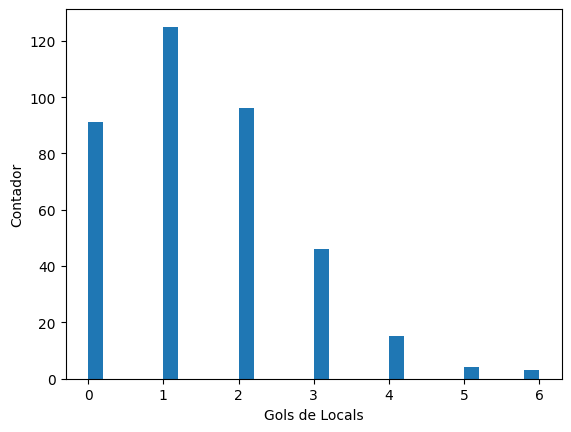

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(partits["home_team_goal_count"], bins=30)
plt.ylabel('Contador')
plt.xlabel('Gols de Locals')

Text(0.5, 0, 'Gols de visitants')

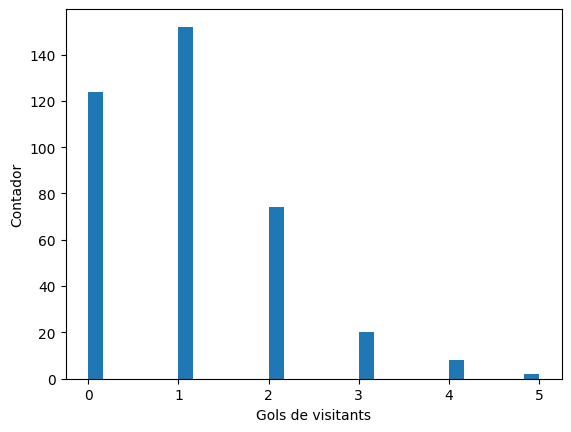

In [117]:
plt.hist(partits["away_team_goal_count"], bins=30)
plt.ylabel('Contador')
plt.xlabel('Gols de visitants')

Text(0.5, 0, 'resultat del partit')

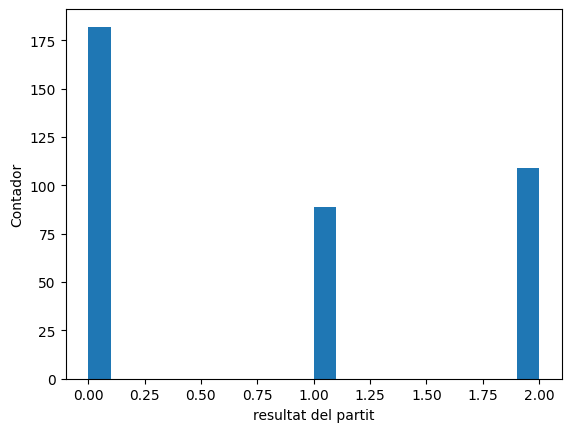

In [118]:
plt.hist(partits["result"], bins=20)
plt.ylabel('Contador')
plt.xlabel('resultat del partit')

In [119]:
train=partits[partits["Game Week"]<20]
test=partits[partits["Game Week"]>19]
predictors=["home_team_code", "away_team_code", "referee_code", "day_code", "hour", "Pre-Match PPG (Home)", "Pre-Match PPG (Away)", "Home Team Pre-Match xG", "Away Team Pre-Match xG", "average_goals_per_match_pre_match", "btts_percentage_pre_match", "btts_percentage_pre_match", "average_corners_per_match_pre_match", "average_cards_per_match_pre_match" ]
#predictors=sorted(partits.select_dtypes(include=["int64", "float64"]))

#Primers models

##Tot 0

In [120]:
from sklearn.metrics import accuracy_score
tot_0=np.zeros(len(test["result"]))
encert_result_tot0 = accuracy_score(test["result"], tot_0, normalize=True)
print(encert_result_tot0)

0.5210526315789473


## Creació del model (TotallyRandom)

In [121]:
import numpy as np
random_results= np.random.choice([0,1, 2], size=len(partits['result']))

In [122]:
encert_result_random = accuracy_score(partits["result"], random_results, normalize=True)
print(encert_result_random)

0.3157894736842105


## Creació del model (LinearRegression)



In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [124]:
lr_result=LinearRegression()
lr_result.fit(train[predictors], train["result"])

LinearRegression()

In [125]:
from sklearn.metrics import mean_squared_error
predic_result_lr=lr_result.predict(test[predictors])
encert_result_lr=1-mean_squared_error(test["result"], predic_result_lr)
print(encert_result_lr)

0.3106399122527589


##Creació del model (RandomForest)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf_result= RandomForestClassifier(random_state=1)

In [128]:
rf_result.fit(train[predictors], train["result"])

RandomForestClassifier(random_state=1)

In [129]:
predic_result_rf=rf_result.predict(test[predictors])


In [130]:
encert_result_rf = accuracy_score(test["result"], predic_result_rf, normalize=True)
print(encert_result_rf)

0.46842105263157896


In [131]:
len(predic_result_rf)

190

## Creació del model (XGBoost)

In [132]:
pip install --upgrade xgboost

In [133]:
from xgboost import XGBClassifier

In [134]:
bst_result = XGBClassifier(objective='multi:softmax', num_class=3)
bst_result.fit(train[predictors].to_numpy(), train["result"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [135]:
predic_result_bst=bst_result.predict(test[predictors].to_numpy())
encert_result_bst=accuracy_score(test["result"], predic_result_bst, normalize=True)
print(encert_result_bst)

0.39473684210526316


##Comparació entre models

Text(0.5, 1.0, 'Comparació dels diferents models base')

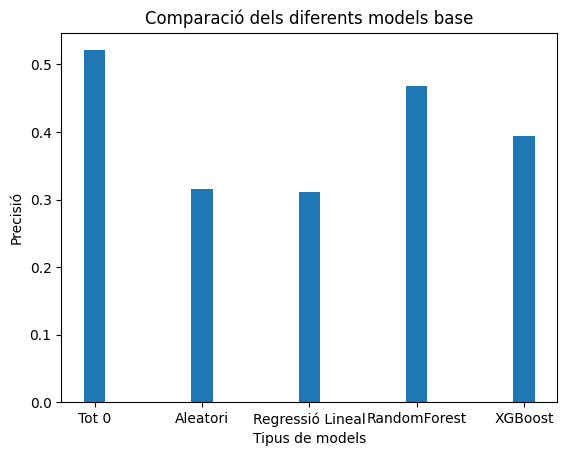

In [136]:
encerts=[encert_result_tot0, encert_result_random, encert_result_lr, encert_result_rf, encert_result_bst]
models=["Tot 0", "Aleatori", "Regressió Lineal", "RandomForest", "XGBoost"]
plt.bar(models, encerts, width=0.2)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació dels diferents models base")

#Tuning dels models inicials

##Tuning del Linar Regression

In [137]:
lr_result_tuned=LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1, positive=False)
lr_result_tuned.fit(train[predictors], train["result"])

LinearRegression(n_jobs=-1)

In [138]:
predic_result_lr_tuned=lr_result_tuned.predict(test[predictors])
encert_result_lr_tuned=1-mean_squared_error(test["result"], predic_result_lr_tuned)
print(encert_result_lr_tuned)

0.3106399122527589


Text(0.5, 1.0, 'Comparació entre el model de regressió lineal base i tunejat')

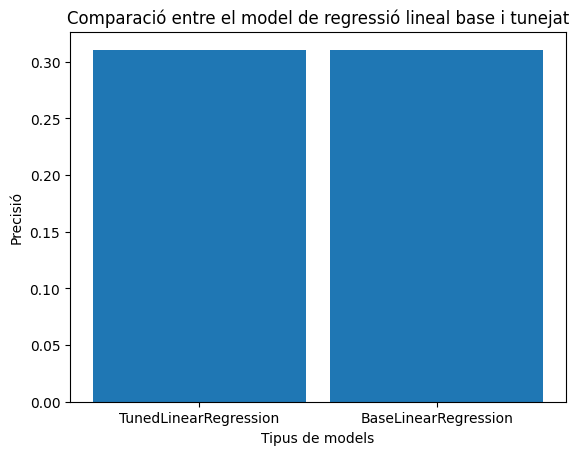

In [139]:
encerts_lr=[encert_result_lr_tuned, encert_result_lr]
models_lr=["TunedLinearRegression", "BaseLinearRegression"]
plt.bar(models_lr, encerts_lr, width=0.9)
plt.ylabel("Precisió")
plt.xlabel("Tipus de models")
plt.title("Comparació entre el model de regressió lineal base i tunejat")

## Tuning del RandomForest


In [140]:
rf_result_tuned= RandomForestClassifier(n_estimators=10, min_samples_split=10, max_features=None, random_state=1, bootstrap=True, max_samples=1)

In [141]:
rf_result_tuned.fit(train[predictors], train["result"])

RandomForestClassifier(max_features=None, max_samples=1, min_samples_split=10,
                       n_estimators=10, random_state=1)

In [142]:
predic_result_rf_tuned=rf_result_tuned.predict(test[predictors])

In [143]:
encert_result_rf_tuned = accuracy_score(test["result"], predic_result_rf_tuned, normalize=True)
print(encert_result_rf_tuned)

0.5210526315789473


Text(0.5, 1.0, 'Comparació entre el model RandomForest base i tunejat')

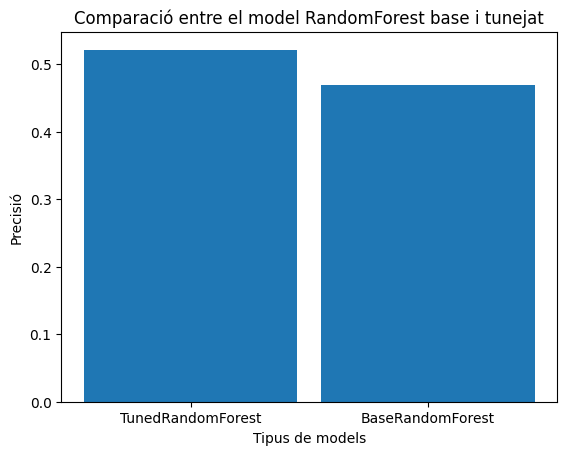

In [144]:
encerts_rf=[encert_result_rf_tuned, encert_result_rf]
models_rf=["TunedRandomForest", "BaseRandomForest"]
plt.bar(models_rf, encerts_rf, width=0.9)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació entre el model RandomForest base i tunejat")

In [145]:
print(predic_result_rf_tuned)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


##Tuning del XGBoost

In [146]:
bst_result_tuned = XGBClassifier(objective="multi:softmax",
                                 num_class=3,
                                 max_depth=20,
                                 subsample=0.4,
                                 colsample_bylevel=0.1,
                                 colsample_bytree=0.1,
                                 min_child_weight=30,
                                 n_estimators=200,
                                 learning_rate=0.01,
                                 random_state=1
                                 )
bst_result_tuned.fit(train[predictors].to_numpy(), train["result"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.1, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [147]:
predic_result_bst_tuned=bst_result_tuned.predict(test[predictors].to_numpy())
encert_result_bst_tuned=accuracy_score(test["result"], predic_result_bst_tuned, normalize=True)
print(encert_result_bst_tuned)

0.5210526315789473


Text(0.5, 1.0, 'Comparació entre el model XGBoost base i tunejat')

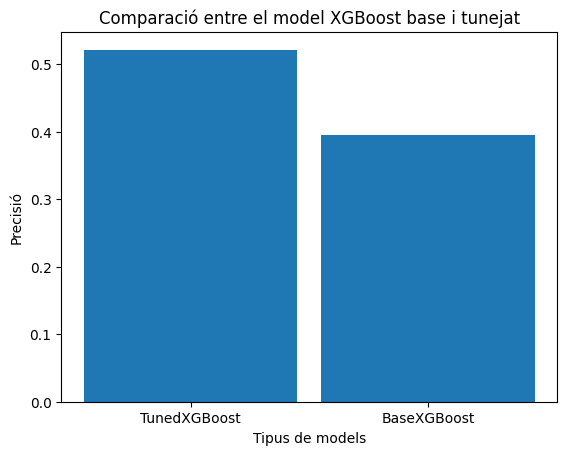

In [148]:
models_bst=["TunedXGBoost", "BaseXGBoost"]
encerts_bst=[encert_result_bst_tuned, encert_result_bst]
plt.bar(models_bst, encerts_bst, width=0.9)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació entre el model XGBoost base i tunejat")

In [149]:
print(predic_result_bst_tuned)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


##Comparació entre models tunejats


Text(0.5, 1.0, 'Precisió dels models tunejats')

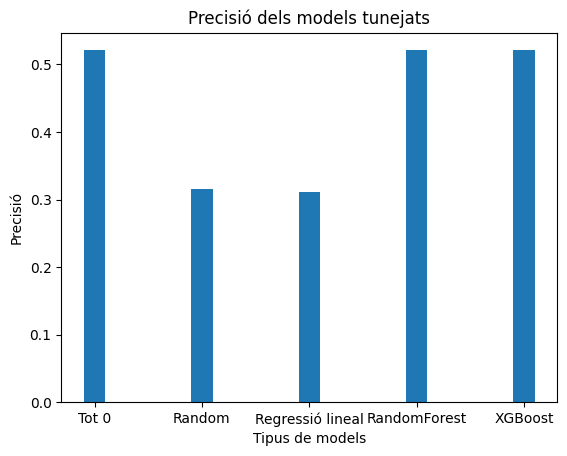

In [150]:
encert_tuned=[encert_result_tot0, encert_result_random, encert_result_lr_tuned, encert_result_rf_tuned, encert_result_bst_tuned]
models_tuned=["Tot 0", "Random", "Regressió lineal", "RandomForest", "XGBoost"]
plt.bar(models_tuned, encert_tuned, width=0.2)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Precisió dels models tunejats")

#Feature Engineering

In [151]:
partits.head()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,home_team_code,away_team_code,referee_code,day_code,hour,result
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,4.75,10.00,2.00,1.75,3,17,3,4,19,0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,3.60,7.00,1.80,1.95,4,10,16,5,15,1
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,3.50,6.50,1.75,2.00,16,19,15,5,17,2
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,2.28,3.75,2.10,1.67,7,12,0,5,19,1
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,4.50,9.50,2.00,1.75,5,15,6,6,15,2


In [152]:
punts_dict={}
prematch_points_home_team=[]
prematch_points_away_team=[]
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  home_team_points=punts_dict.get(home_team,0)
  away_team_points=punts_dict.get(away_team,0)
  prematch_points_home_team.append(home_team_points)
  prematch_points_away_team.append(away_team_points)
  result = r.get('result', '')
  if result == 0:
    punts_dict[home_team] = home_team_points + 3
  elif result == 1:
    punts_dict[home_team] = home_team_points + 1
    punts_dict[away_team] = away_team_points + 1
  elif result == 2:
    punts_dict[away_team] = away_team_points + 3
partits['prematch_points_home_team'] = prematch_points_home_team
partits['prematch_points_away_team'] = prematch_points_away_team


In [153]:
partits.tail()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,odds_btts_yes,odds_btts_no,home_team_code,away_team_code,referee_code,day_code,hour,result,prematch_points_home_team,prematch_points_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1685905200,2023-06-04 19:00:00,Real Betis,Valencia CF,Javier Alberola Rojas,38,1.72,0.67,1.68,0.68,1,...,1.57,2.25,13,18,7,6,19,1,59,41
1685905200,2023-06-04 19:00:00,Celta de Vigo,FC Barcelona,Juan Luis Pulido Santana,38,1.33,2.22,1.42,2.11,2,...,1.62,2.20,4,7,13,6,19,0,40,88
1685905200,2023-06-04 19:00:00,Real Valladolid,Getafe CF,José Luis Munuera Montero,38,1.50,0.78,1.47,0.79,0,...,1.95,1.80,16,8,11,6,19,1,39,41
1685905200,2023-06-04 19:00:00,Elche CF,Cádiz,Jesús Gil Manzano,38,0.78,0.78,0.79,0.79,1,...,1.67,2.10,6,5,9,6,19,1,24,41
1685905200,2023-06-04 19:00:00,RCD Espanyol,Almería,César Soto Grado,38,1.00,0.39,1.00,0.42,3,...,1.44,2.63,10,0,4,6,19,1,36,40


In [154]:
vermelles_dict={}
prematch_cards_home_team=[]
prematch_cards_away_team=[]
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  home_team_cards=vermelles_dict.get(home_team,0)
  away_team_cards=vermelles_dict.get(away_team,0)
  prematch_cards_home_team.append(home_team_cards)
  prematch_cards_away_team.append(away_team_cards)
  vermelles_dict[home_team]=r.get("home_team_red_cards", "")
  vermelles_dict[away_team]=r.get("away_team_red_cards", "")
partits["Sanctioned_players_home_team"]=prematch_cards_home_team
partits["Sanctioned_players_away_team"]=prematch_cards_away_team


In [155]:
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,home_team_code,away_team_code,referee_code,day_code,hour,result,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,3,17,3,4,19,0,0,0,0,0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,4,10,16,5,15,1,0,0,0,0
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,16,19,15,5,17,2,0,0,0,0
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,7,12,0,5,19,1,0,0,0,0
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,5,15,6,6,15,2,0,0,0,0
1660498200,2022-08-14 17:30:00,Valencia CF,Girona FC,Jorge Figueroa Vázquez,1,0.0,0.0,1.53,0.84,1,...,18,9,10,6,17,0,0,0,0,0
1660507200,2022-08-14 20:00:00,Almería,Real Madrid,Juan Martínez Munuera,1,0.0,0.0,1.74,1.79,1,...,0,14,14,6,20,2,0,0,0,0
1660577400,2022-08-15 15:30:00,Athletic Club Bilbao,RCD Mallorca,Javier Iglesias Villanueva,1,0.0,0.0,1.42,0.79,0,...,1,11,8,0,15,1,0,0,0,0
1660584600,2022-08-15 17:30:00,Getafe CF,Atlético Madrid,José María Sánchez Martínez,1,0.0,0.0,1.42,1.84,0,...,8,2,12,0,17,2,0,0,0,0


In [156]:
possession_dict={}
total_possession_dict={}
average_possession_home_team=[]
average_possession_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_possession_dict:
    total_possession_dict[home_team] = 0
  if away_team not in total_possession_dict:
    total_possession_dict[away_team] = 0
  home_team_possession=possession_dict.get(home_team,0)
  away_team_possession=possession_dict.get(away_team,0)
  home_team_total_possession=total_possession_dict.get(home_team,0)
  away_team_total_possession=total_possession_dict.get(away_team,0)
  average_possession_home_team.append(home_team_possession)
  average_possession_away_team.append(away_team_possession)
  total_possession_dict[home_team]=total_possession_dict[home_team]+r.get("home_team_possession", "")
  total_possession_dict[away_team]=total_possession_dict[away_team]+r.get("away_team_possession", "")
  possession_dict[home_team]=total_possession_dict[home_team]/contador_partits
  possession_dict[away_team]=total_possession_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_possession_home_team"]=average_possession_home_team
partits["average_possession_away_team"]=average_possession_away_team
partits.tail()

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,referee_code,day_code,hour,result,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1685905200,2023-06-04 19:00:00,Real Betis,Valencia CF,Javier Alberola Rojas,38,1.72,0.67,1.68,0.68,1,...,7,6,19,1,59,41,0,0,50.378378,52.459459
1685905200,2023-06-04 19:00:00,Celta de Vigo,FC Barcelona,Juan Luis Pulido Santana,38,1.33,2.22,1.42,2.11,2,...,13,6,19,0,40,88,0,0,50.702703,64.621622
1685905200,2023-06-04 19:00:00,Real Valladolid,Getafe CF,José Luis Munuera Montero,38,1.50,0.78,1.47,0.79,0,...,11,6,19,1,39,41,0,0,48.000000,40.054054
1685905200,2023-06-04 19:00:00,Elche CF,Cádiz,Jesús Gil Manzano,38,0.78,0.78,0.79,0.79,1,...,9,6,19,1,24,41,0,0,44.810811,41.891892
1685905200,2023-06-04 19:00:00,RCD Espanyol,Almería,César Soto Grado,38,1.00,0.39,1.00,0.42,3,...,4,6,19,1,36,40,0,0,42.405405,45.216216


In [157]:
fouls_dict={}
total_fouls_dict={}
average_fouls_home_team=[]
average_fouls_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_fouls_dict:
    total_fouls_dict[home_team] = 0
  if away_team not in total_fouls_dict:
    total_fouls_dict[away_team] = 0
  home_team_fouls=fouls_dict.get(home_team,0)
  away_team_fouls=fouls_dict.get(away_team,0)
  home_team_total_fouls=total_fouls_dict.get(home_team,0)
  away_team_total_fouls=total_fouls_dict.get(away_team,0)
  average_fouls_home_team.append(home_team_fouls)
  average_fouls_away_team.append(away_team_fouls)
  total_fouls_dict[home_team]=total_fouls_dict[home_team]+r.get("home_team_fouls", "")
  total_fouls_dict[away_team]=total_fouls_dict[away_team]+r.get("away_team_fouls", "")
  fouls_dict[home_team]=total_fouls_dict[home_team]/contador_partits
  fouls_dict[away_team]=total_fouls_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_fouls_home_team"]=average_fouls_home_team
partits["average_fouls_away_team"]=average_fouls_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,hour,result,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,19,0,0,0,0,0,0.0,0.0,0.0,0.0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,15,1,0,0,0,0,0.0,0.0,0.0,0.0
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,17,2,0,0,0,0,0.0,0.0,0.0,0.0
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,19,1,0,0,0,0,0.0,0.0,0.0,0.0
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,15,2,0,0,0,0,0.0,0.0,0.0,0.0
1660498200,2022-08-14 17:30:00,Valencia CF,Girona FC,Jorge Figueroa Vázquez,1,0.0,0.0,1.53,0.84,1,...,17,0,0,0,0,0,0.0,0.0,0.0,0.0
1660507200,2022-08-14 20:00:00,Almería,Real Madrid,Juan Martínez Munuera,1,0.0,0.0,1.74,1.79,1,...,20,2,0,0,0,0,0.0,0.0,0.0,0.0
1660577400,2022-08-15 15:30:00,Athletic Club Bilbao,RCD Mallorca,Javier Iglesias Villanueva,1,0.0,0.0,1.42,0.79,0,...,15,1,0,0,0,0,0.0,0.0,0.0,0.0
1660584600,2022-08-15 17:30:00,Getafe CF,Atlético Madrid,José María Sánchez Martínez,1,0.0,0.0,1.42,1.84,0,...,17,2,0,0,0,0,0.0,0.0,0.0,0.0


In [158]:
shots_dict={}
total_shots_dict={}
average_shots_home_team=[]
average_shots_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_shots_dict:
    total_shots_dict[home_team] = 0
  if away_team not in total_shots_dict:
    total_shots_dict[away_team] = 0
  home_team_shots=shots_dict.get(home_team,0)
  away_team_shots=shots_dict.get(away_team,0)
  home_team_total_shots=total_shots_dict.get(home_team,0)
  away_team_total_shots=total_shots_dict.get(away_team,0)
  average_shots_home_team.append(home_team_shots)
  average_shots_away_team.append(away_team_shots)
  total_shots_dict[home_team]=total_shots_dict[home_team]+r.get("home_team_shots", "")
  total_shots_dict[away_team]=total_shots_dict[away_team]+r.get("away_team_shots", "")
  shots_dict[home_team]=total_shots_dict[home_team]/contador_partits
  shots_dict[away_team]=total_shots_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_shots_home_team"]=average_shots_home_team
partits["average_shots_away_team"]=average_shots_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,prematch_points_home_team,prematch_points_away_team,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team,average_shots_home_team,average_shots_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660498200,2022-08-14 17:30:00,Valencia CF,Girona FC,Jorge Figueroa Vázquez,1,0.0,0.0,1.53,0.84,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660507200,2022-08-14 20:00:00,Almería,Real Madrid,Juan Martínez Munuera,1,0.0,0.0,1.74,1.79,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660577400,2022-08-15 15:30:00,Athletic Club Bilbao,RCD Mallorca,Javier Iglesias Villanueva,1,0.0,0.0,1.42,0.79,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1660584600,2022-08-15 17:30:00,Getafe CF,Atlético Madrid,José María Sánchez Martínez,1,0.0,0.0,1.42,1.84,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
shots_ontarget_dict={}
total_shots_ontarget_dict={}
average_shots_ontarget_home_team=[]
average_shots_ontarget_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_shots_ontarget_dict:
    total_shots_ontarget_dict[home_team] = 0
  if away_team not in total_shots_ontarget_dict:
    total_shots_ontarget_dict[away_team] = 0
  home_team_shots_ontarget=shots_ontarget_dict.get(home_team,0)
  away_team_shots_ontarget=shots_ontarget_dict.get(away_team,0)
  home_team_total_shots_ontarget=total_shots_ontarget_dict.get(home_team,0)
  away_team_total_shots_ontarget=total_shots_ontarget_dict.get(away_team,0)
  average_shots_ontarget_home_team.append(home_team_shots_ontarget)
  average_shots_ontarget_away_team.append(away_team_shots_ontarget)
  total_shots_ontarget_dict[home_team]=total_shots_ontarget_dict[home_team]+r.get("home_team_shots_on_target", "")
  total_shots_ontarget_dict[away_team]=total_shots_ontarget_dict[away_team]+r.get("away_team_shots_on_target", "")
  shots_ontarget_dict[home_team]=total_shots_ontarget_dict[home_team]/contador_partits
  shots_ontarget_dict[away_team]=total_shots_ontarget_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_shots_ontarget_home_team"]=average_shots_ontarget_home_team
partits["average_shots_ontarget_away_team"]=average_shots_ontarget_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,Sanctioned_players_home_team,Sanctioned_players_away_team,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team,average_shots_home_team,average_shots_away_team,average_shots_ontarget_home_team,average_shots_ontarget_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660498200,2022-08-14 17:30:00,Valencia CF,Girona FC,Jorge Figueroa Vázquez,1,0.0,0.0,1.53,0.84,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660507200,2022-08-14 20:00:00,Almería,Real Madrid,Juan Martínez Munuera,1,0.0,0.0,1.74,1.79,1,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660577400,2022-08-15 15:30:00,Athletic Club Bilbao,RCD Mallorca,Javier Iglesias Villanueva,1,0.0,0.0,1.42,0.79,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660584600,2022-08-15 17:30:00,Getafe CF,Atlético Madrid,José María Sánchez Martínez,1,0.0,0.0,1.42,1.84,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
shots_offtarget_dict={}
total_shots_offtarget_dict={}
average_shots_offtarget_home_team=[]
average_shots_offtarget_away_team=[]
contador=1
contador_partits=1
for i, r in partits.iterrows():
  home_team=r["home_team_name"]
  away_team=r["away_team_name"]
  if home_team not in total_shots_offtarget_dict:
    total_shots_offtarget_dict[home_team] = 0
  if away_team not in total_shots_offtarget_dict:
    total_shots_offtarget_dict[away_team] = 0
  home_team_shots_offtarget=shots_offtarget_dict.get(home_team,0)
  away_team_shots_offtarget=shots_offtarget_dict.get(away_team,0)
  home_team_total_shots_offtarget=total_shots_offtarget_dict.get(home_team,0)
  away_team_total_shots_offtarget=total_shots_offtarget_dict.get(away_team,0)
  average_shots_offtarget_home_team.append(home_team_shots_offtarget)
  average_shots_offtarget_away_team.append(away_team_shots_offtarget)
  total_shots_offtarget_dict[home_team]=total_shots_offtarget_dict[home_team]+r.get("home_team_shots_off_target", "")
  total_shots_offtarget_dict[away_team]=total_shots_offtarget_dict[away_team]+r.get("away_team_shots_off_target", "")
  shots_offtarget_dict[home_team]=total_shots_offtarget_dict[home_team]/contador_partits
  shots_offtarget_dict[away_team]=total_shots_offtarget_dict[away_team]/contador_partits
  contador=contador+1
  if contador==11:
    contador_partits=contador_partits+1
    contador=1
partits["average_shots_offtarget_home_team"]=average_shots_offtarget_home_team
partits["average_shots_offtarget_away_team"]=average_shots_offtarget_away_team
partits.head(20)

,date_GMT,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,...,average_possession_home_team,average_possession_away_team,average_fouls_home_team,average_fouls_away_team,average_shots_home_team,average_shots_away_team,average_shots_ontarget_home_team,average_shots_ontarget_away_team,average_shots_offtarget_home_team,average_shots_offtarget_away_team
timestamp,,,,,,,,,,,,,,,,,,,,,
1660330800,2022-08-12 19:00:00,CA Osasuna,Sevilla FC,Carlos Del Cerro Grande,1,0.0,0.0,1.79,1.21,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660402800,2022-08-13 15:00:00,Celta de Vigo,RCD Espanyol,Miguel Ángel Ortiz Arias,1,0.0,0.0,1.42,0.95,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660410000,2022-08-13 17:00:00,Real Valladolid,Villarreal,Mario Melero López,1,0.0,0.0,1.47,1.32,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660417200,2022-08-13 19:00:00,FC Barcelona,Rayo Vallecano,Alejandro José Hernández Hernández,1,0.0,0.0,2.53,0.89,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660491000,2022-08-14 15:30:00,Cádiz,Real Sociedad,Isidro Díaz de Mera Escuderos,1,0.0,0.0,1.42,1.74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660498200,2022-08-14 17:30:00,Valencia CF,Girona FC,Jorge Figueroa Vázquez,1,0.0,0.0,1.53,0.84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660507200,2022-08-14 20:00:00,Almería,Real Madrid,Juan Martínez Munuera,1,0.0,0.0,1.74,1.79,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660577400,2022-08-15 15:30:00,Athletic Club Bilbao,RCD Mallorca,Javier Iglesias Villanueva,1,0.0,0.0,1.42,0.79,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660584600,2022-08-15 17:30:00,Getafe CF,Atlético Madrid,José María Sánchez Martínez,1,0.0,0.0,1.42,1.84,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
train_postfe=partits[partits["Game Week"]<20]
test_postfe=partits[partits["Game Week"]>19]
predictors_postfe=["home_team_code",
            "away_team_code",
            "referee_code",
            "day_code",
            "hour",
            "Pre-Match PPG (Home)",
            "Pre-Match PPG (Away)",
            "Home Team Pre-Match xG",
            "Away Team Pre-Match xG",
            "average_goals_per_match_pre_match",
            "btts_percentage_pre_match",
            "btts_percentage_pre_match",
            "average_corners_per_match_pre_match",
            "average_cards_per_match_pre_match",
            "prematch_points_home_team",
            "prematch_points_away_team",
            "Sanctioned_players_home_team",
            "Sanctioned_players_away_team",
            "average_possession_home_team",
            "average_possession_away_team",
            "average_fouls_home_team",
            "average_fouls_away_team",
            "average_shots_home_team",
            "average_shots_away_team",
            "average_shots_ontarget_home_team",
            "average_shots_ontarget_away_team",
            "average_shots_offtarget_home_team",
            "average_shots_offtarget_away_team"]

#Nous models amb el feature engineering

##Linear regression

In [162]:
lr_result_tuned.fit(train_postfe[predictors_postfe], train_postfe["result"])

LinearRegression(n_jobs=-1)

In [163]:
predic_result_lr_tuned_postfe=lr_result_tuned.predict(test_postfe[predictors_postfe])
encert_result_lr_tuned_postfe=1-mean_squared_error(test_postfe["result"], predic_result_lr_tuned_postfe)
print(encert_result_lr_tuned_postfe)

0.268627035256811


Text(0.5, 1.0, 'Comparació entre el model abans i després del feature engineering')

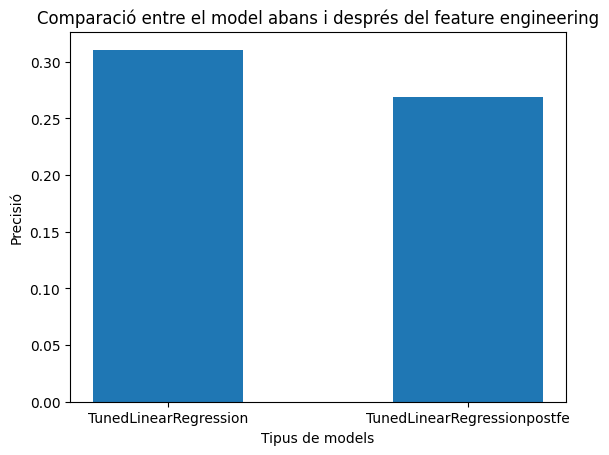

In [164]:
encerts_lr=[encert_result_lr_tuned, encert_result_lr_tuned_postfe]
models_lr=["TunedLinearRegression", "TunedLinearRegressionpostfe"]
plt.bar(models_lr, encerts_lr, width=0.5)
plt.ylabel("Precisió")
plt.xlabel("Tipus de models")
plt.title("Comparació entre el model abans i després del feature engineering")

##RandomForest


In [165]:
rf_result_tuned.fit(train_postfe[predictors_postfe], train_postfe["result"])

RandomForestClassifier(max_features=None, max_samples=1, min_samples_split=10,
                       n_estimators=10, random_state=1)

In [166]:
predic_result_rf_tuned_postfe=rf_result_tuned.predict(test_postfe[predictors_postfe])
encert_result_rf_tuned_postfe= accuracy_score(test_postfe["result"], predic_result_rf_tuned_postfe, normalize=True)
print(encert_result_rf_tuned_postfe)

0.5210526315789473


Text(0.5, 1.0, 'Comparació entre el model RandomForest abans i després del feature engineering')

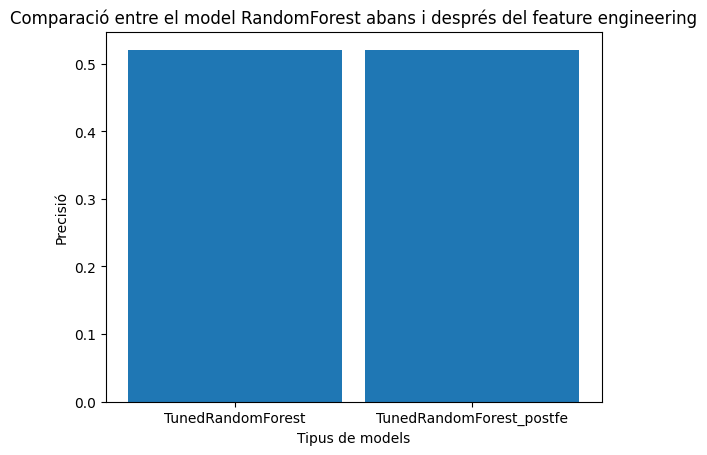

In [167]:
models_rf=["TunedRandomForest", "TunedRandomForest_postfe"]
encerts_rf=[encert_result_rf_tuned, encert_result_rf_tuned_postfe]
plt.bar(models_rf, encerts_rf, width=0.9)
plt.ylabel('Precisió')
plt.xlabel('Tipus de models')
plt.title("Comparació entre el model RandomForest abans i després del feature engineering")

In [168]:
print(predic_result_rf_tuned_postfe)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


##XGBoost

In [169]:

bst_result_tuned.fit(train_postfe[predictors_postfe].to_numpy(), train_postfe["result"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.1, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=30, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [170]:
predic_result_bst_tuned_postfe=bst_result_tuned.predict(test_postfe[predictors_postfe].to_numpy())
encert_result_bst_tuned_postfe=accuracy_score(test_postfe["result"], predic_result_bst_tuned_postfe, normalize=True)
print(encert_result_bst_tuned_postfe)

0.5210526315789473
